In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 加载数据集  
data = pd.read_csv("./Lingcang202001-202312.csv")
# 查看数据集的维度
print(data.shape)
# 查看数据集的前几行
print(data.head())

(1464, 6)
   year  month  day  temp_min  temp_max  average
0  2020      1    1         9        20     14.5
1  2020      1    2         8        19     13.5
2  2020      1    3        10        21     15.5
3  2020      1    4         9        17     13.0
4  2020      1    5        10        17     13.5


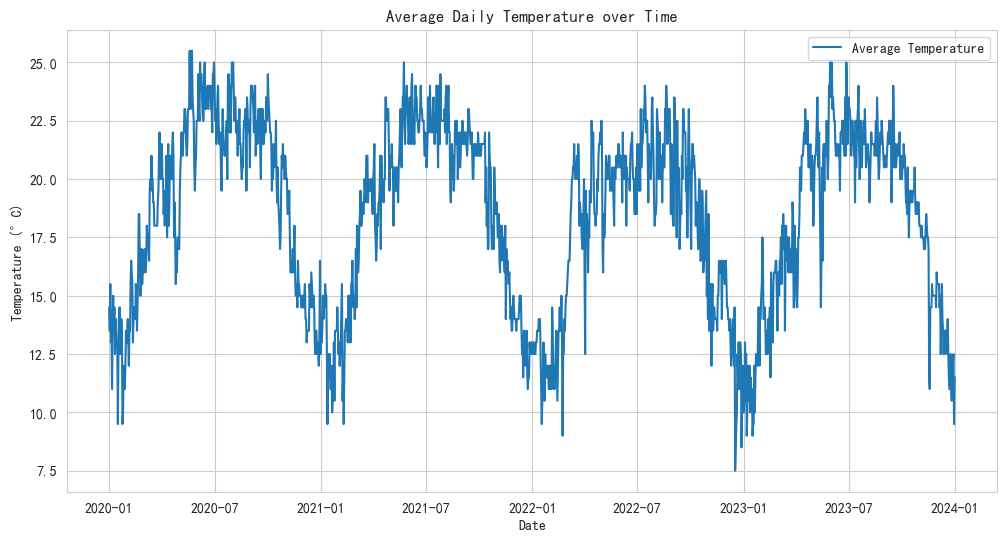

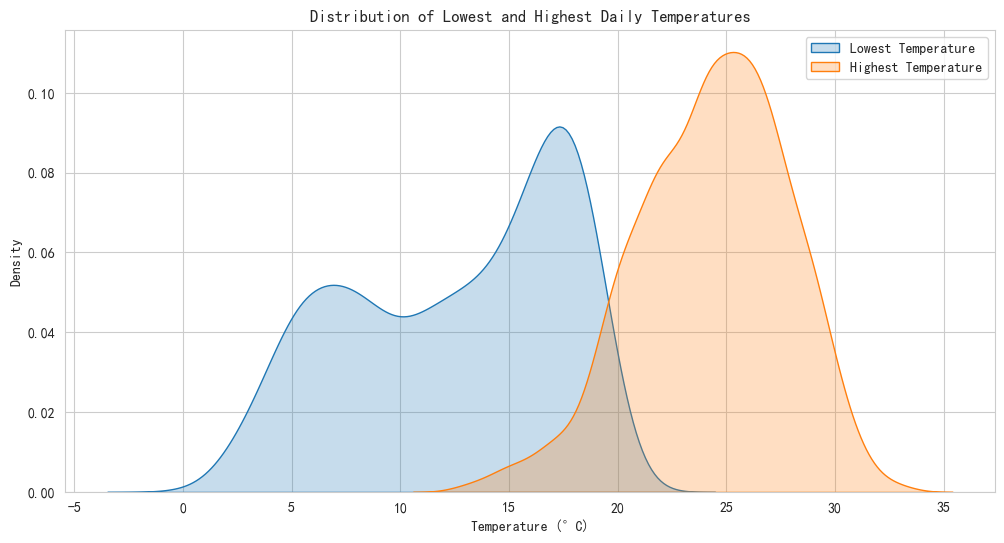

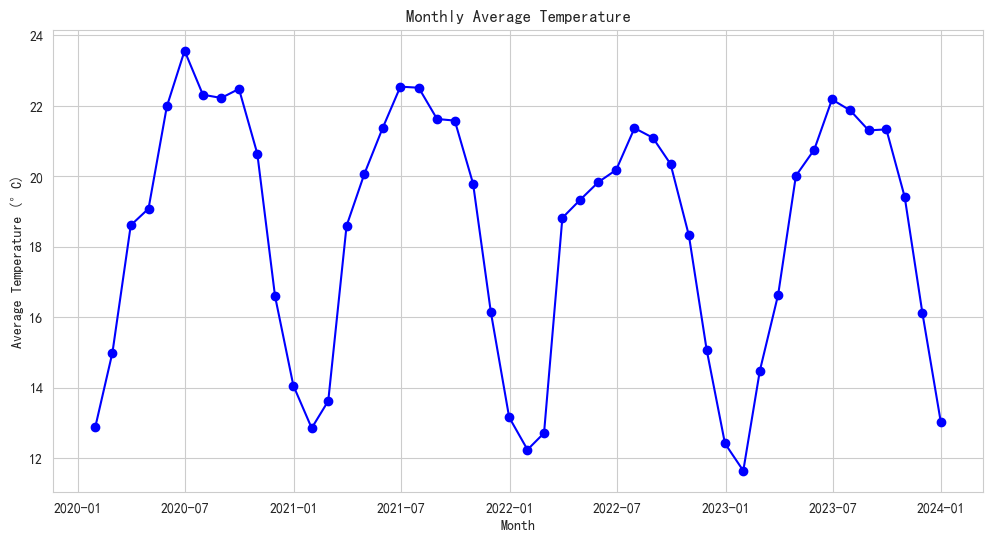

In [30]:
# 可视化数据集
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体和负号正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据集  
df = pd.read_csv("./Lingcang202001-202312.csv")
# 转换年月日为日期格式，并设置为索引
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)

# 可视化平均气温的时间序列
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['average'], label='Average Temperature')
plt.title('Average Daily Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 可视化最高和最低气温的分布情况
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='temp_min', label='Lowest Temperature', fill=True)
sns.kdeplot(data=df, x='temp_max', label='Highest Temperature', fill=True)
plt.title('Distribution of Lowest and Highest Daily Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend()
plt.show()

# 计算并可视化每月的平均气温
monthly_avg = df.resample('ME')['average'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

In [31]:
# 数据预处理：将年份、月份和日期转换为datetime对象，以便于日期筛选  
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# 根据日期划分数据集  
train_mask = (data['date'] >= '2020-01-01') & (data['date'] <= '2022-11-30')
val_mask = (data['date'] >= '2022-12-01') & (data['date'] <= '2022-12-31')
test_mask = (data['date'] >= '2023-01-01') & (data['date'] <= '2023-12-31')

train_data = data[train_mask]  # 训练集
val_data = data[val_mask]  # 验证集
test_data = data[test_mask]  # 测试集

# 查看数据集的维度
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(1070, 7)
(31, 7)
(363, 7)


In [32]:
# 特征工程：将年份、月份、日期作为特征，实际气温为目标变量 
X_train = train_data[['year', 'month', 'day']]
y_train = train_data['average']
X_val = val_data[['year', 'month', 'day']]
y_val = val_data['average']
X_test = test_data[['year', 'month', 'day']]
y_test = test_data['average']

In [33]:
 
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

# 线性回归  
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 随机森林回归  
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)


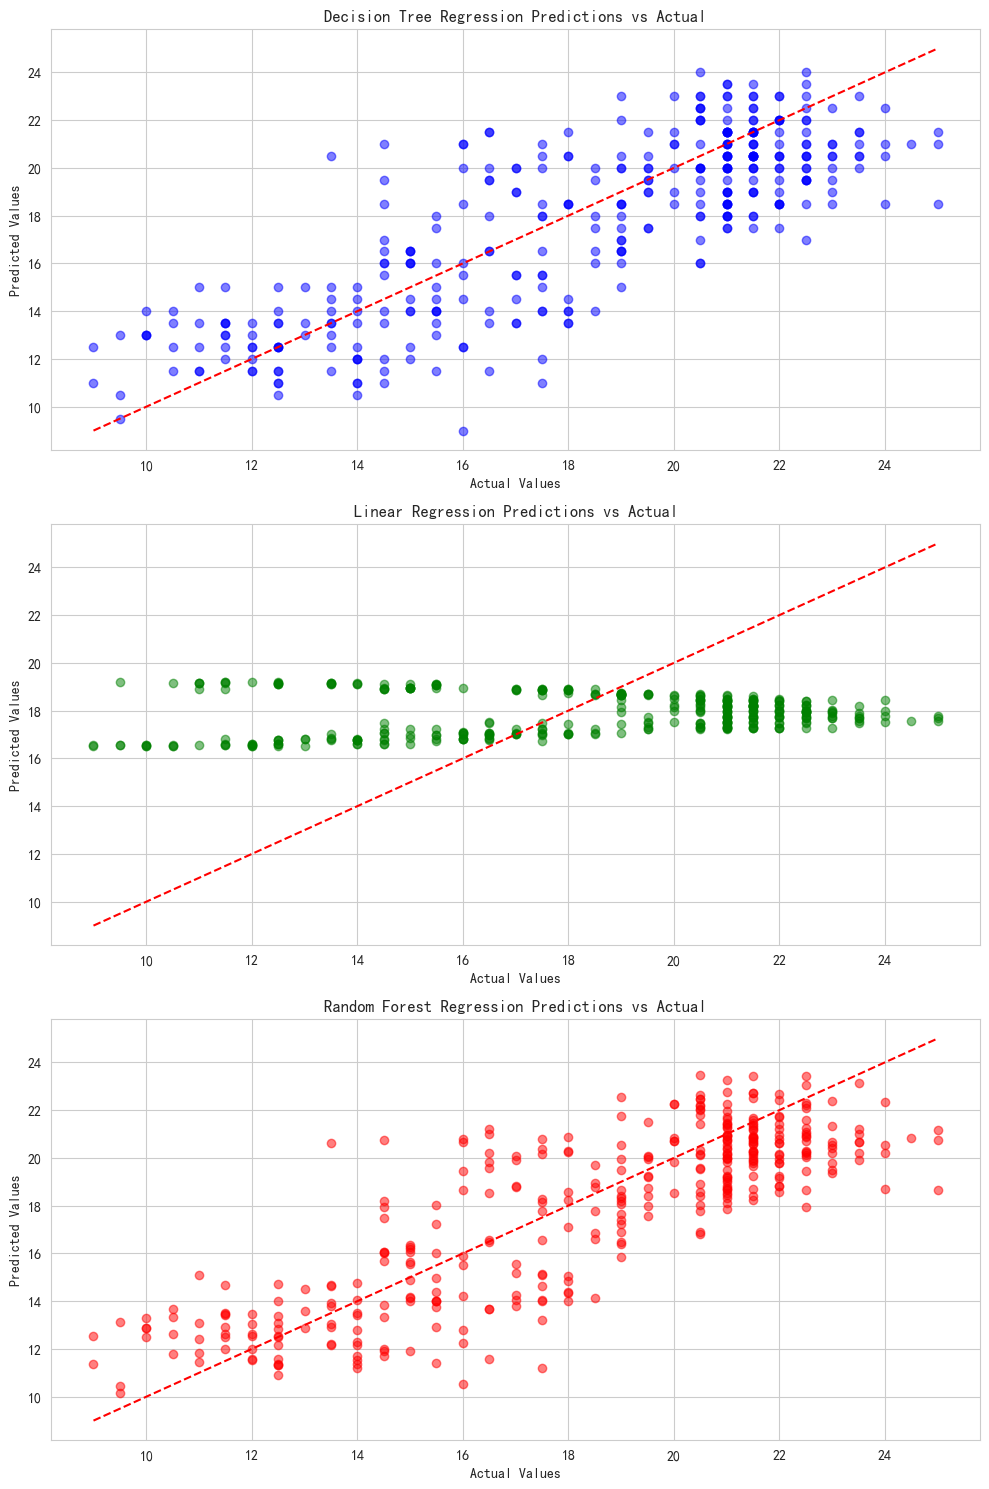

In [34]:
# 假设你已经有了 y_test 和各个模型的预测值 y_pred_dtr, y_pred_lr, y_pred_rfr  

# 为可视化创建一个画布和三个子图  
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# 决策树回归的预测结果与实际值对比  
axs[0].scatter(y_test, y_pred_dtr, color='blue', alpha=0.5)
axs[0].set_title('Decision Tree Regression Predictions vs Actual')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].plot([np.min((y_test.min(), y_pred_dtr.min())), np.max((y_test.max(), y_pred_dtr.max()))],
            [np.min((y_test.min(), y_pred_dtr.min())), np.max((y_test.max(), y_pred_dtr.max()))], 'r--')

# 线性回归的预测结果与实际值对比  
axs[1].scatter(y_test, y_pred_lr, color='green', alpha=0.5)
axs[1].set_title('Linear Regression Predictions vs Actual')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')
axs[1].plot([np.min((y_test.min(), y_pred_lr.min())), np.max((y_test.max(), y_pred_lr.max()))],
            [np.min((y_test.min(), y_pred_lr.min())), np.max((y_test.max(), y_pred_lr.max()))], 'r--')

# 随机森林回归的预测结果与实际值对比  
axs[2].scatter(y_test, y_pred_rfr, color='red', alpha=0.5)
axs[2].set_title('Random Forest Regression Predictions vs Actual')
axs[2].set_xlabel('Actual Values')
axs[2].set_ylabel('Predicted Values')
axs[2].plot([np.min((y_test.min(), y_pred_rfr.min())), np.max((y_test.max(), y_pred_rfr.max()))],
            [np.min((y_test.min(), y_pred_rfr.min())), np.max((y_test.max(), y_pred_rfr.max()))], 'r--')

# 显示整个画布上的图形  
plt.tight_layout()
plt.show()

In [35]:
# 评估模型性能  
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred) # 计算均方误差
    rmse = np.sqrt(mse)  # 将均方误差转换为均方根误差
    mae = mean_absolute_error(y_test, y_pred) # 计算平均绝对误差
    r2 = r2_score(y_test, y_pred) # 计算R2分数
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")

# 对验证集进行评估
y_val_pred_dtr = dtr.predict(X_val)
y_val_pred_lr = lr.predict(X_val)
y_val_pred_rfr = rfr.predict(X_val)

print("决策树回归验证集评估结果:")
evaluate_model(y_val, y_val_pred_dtr)

print("线性回归验证集评估结果:")
evaluate_model(y_val, y_val_pred_lr)

print("随机森林回归验证集评估结果:")
evaluate_model(y_val, y_val_pred_rfr)

决策树回归验证集评估结果:
MSE: 4.77, RMSE: 2.18, MAE: 1.65, R2 Score: -0.13
线性回归验证集评估结果:
MSE: 55.39, RMSE: 7.44, MAE: 7.15, R2 Score: -12.05
随机森林回归验证集评估结果:
MSE: 4.35, RMSE: 2.09, MAE: 1.55, R2 Score: -0.03


In [36]:
# 评估模型性能  
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred) # 计算均方误差
    rmse = np.sqrt(mse)  # 将均方误差转换为均方根误差
    mae = mean_absolute_error(y_test, y_pred) # 计算平均绝对误差
    r2 = r2_score(y_test, y_pred) # 计算R2分数
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")

print("决策树回归评估结果:")
evaluate_model(y_test, y_pred_dtr)

print("线性回归评估结果:")
evaluate_model(y_test, y_pred_lr)

print("随机森林回归评估结果:")
evaluate_model(y_test, y_pred_rfr)


决策树回归评估结果:
MSE: 5.64, RMSE: 2.38, MAE: 1.91, R2 Score: 0.62
线性回归评估结果:
MSE: 14.58, RMSE: 3.82, MAE: 3.28, R2 Score: 0.02
随机森林回归评估结果:
MSE: 4.76, RMSE: 2.18, MAE: 1.77, R2 Score: 0.68


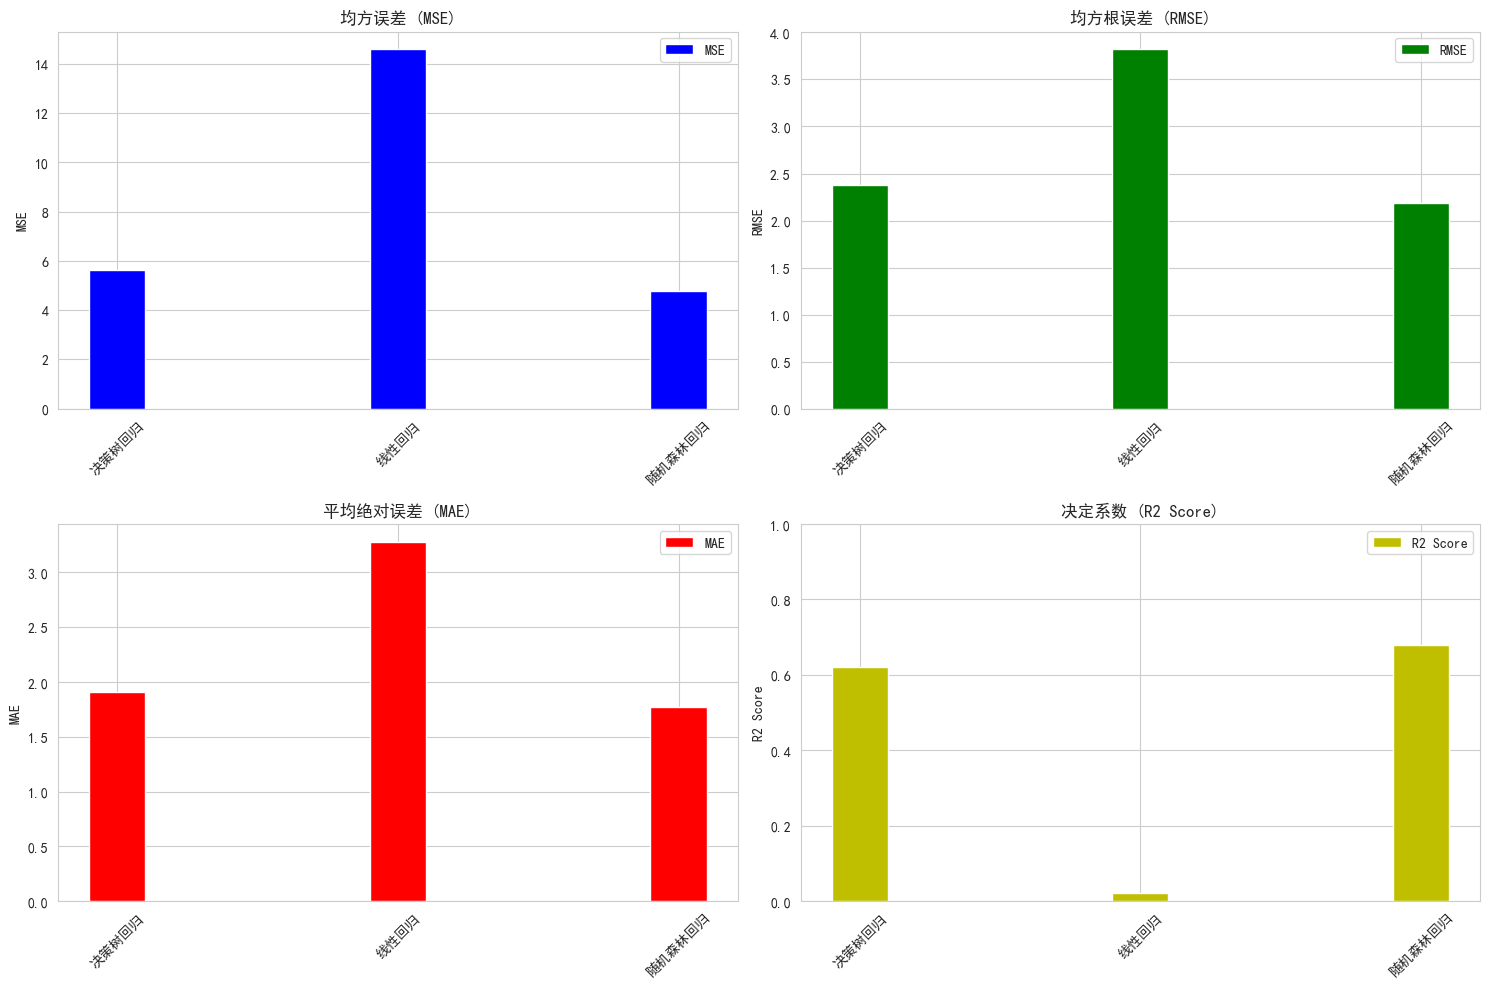

In [37]:
# 可视化MSE RMSE MAE R2 Score
# 评估模型性能  
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred) # 计算均方误差
    rmse = np.sqrt(mse)  # 将均方误差转换为均方根误差
    mae = mean_absolute_error(y_test, y_pred) # 计算平均绝对误差
    r2 = r2_score(y_test, y_pred) # 计算R2分数
    #print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")
    return mse, rmse, mae, r2
# 计算不同模型的评估结果
mse_dtr, rmse_dtr, mae_dtr, r2_dtr = evaluate_model(y_test, y_pred_dtr)
mse_lr, rmse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_rfr, rmse_rfr, mae_rfr, r2_rfr = evaluate_model(y_test, y_pred_rfr)

mse_values = {'决策树回归': mse_dtr, '线性回归': mse_lr, '随机森林回归': mse_rfr}
rmse_values = {'决策树回归': rmse_dtr, '线性回归': rmse_lr, '随机森林回归': rmse_rfr}
mae_values = {'决策树回归': mae_dtr, '线性回归': mae_lr, '随机森林回归': mae_rfr}
r2_values = {'决策树回归': r2_dtr, '线性回归': r2_lr, '随机森林回归': r2_rfr}

# 设置模型名称列表  
models = list(mse_values.keys())
#models = ['决策树回归', '线性回归', '随机森林回归']

# 设置条形图的宽度和位置  
bar_width = 0.2
index = np.arange(len(models))

# 创建一个新的图形，并设置大小  
plt.figure(figsize=(15, 10))

# 绘制MSE条形图  
plt.subplot(2, 2, 1)  # 2行2列的子图中的第1个  
plt.bar(index, list(mse_values.values()), bar_width, label='MSE', color='b')
plt.xticks(index, models, rotation=45)  # 旋转x轴标签以便于阅读  
plt.ylabel('MSE')
plt.title('均方误差 (MSE)')
plt.legend()

# 绘制RMSE条形图  
plt.subplot(2, 2, 2)  # 2行2列的子图中的第2个  
plt.bar(index, list(rmse_values.values()), bar_width, label='RMSE', color='g')
plt.xticks(index, models, rotation=45)
plt.ylabel('RMSE')
plt.title('均方根误差 (RMSE)')
plt.legend()

# 绘制MAE条形图  
plt.subplot(2, 2, 3)  # 2行2列的子图中的第3个  
plt.bar(index, list(mae_values.values()), bar_width, label='MAE', color='r')
plt.xticks(index, models, rotation=45)
plt.ylabel('MAE')
plt.title('平均绝对误差 (MAE)')
plt.legend()

# 绘制R2 Score条形图  
plt.subplot(2, 2, 4)  # 2行2列的子图中的第4个  
plt.bar(index, list(r2_values.values()), bar_width, label='R2 Score', color='y')
plt.xticks(index, models, rotation=45)
plt.ylim(0, 1)  # 设置y轴范围为0到1  
plt.ylabel('R2 Score')
plt.title('决定系数 (R2 Score)')
plt.legend()

# 调整子图之间的距离  
plt.tight_layout()

# 显示图形  
plt.show()

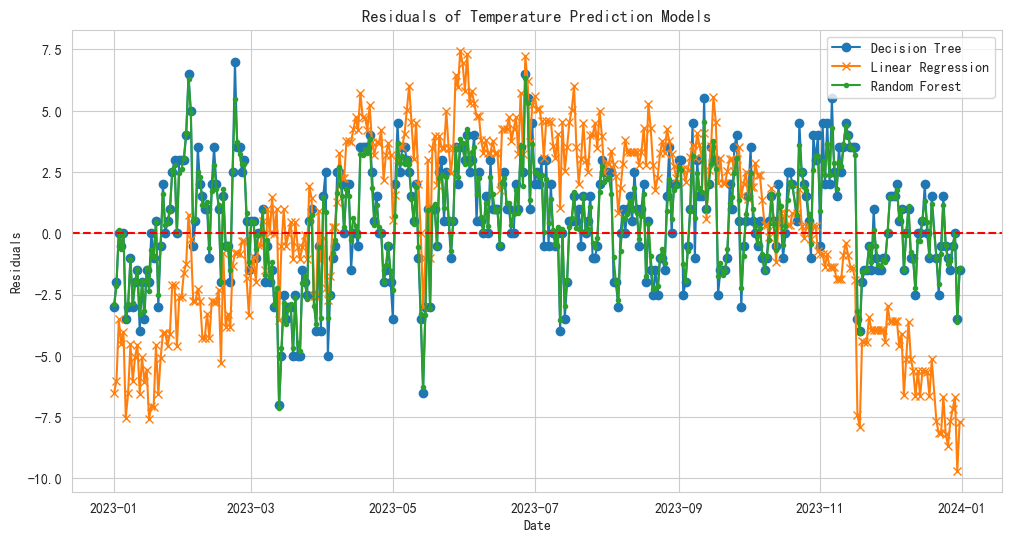

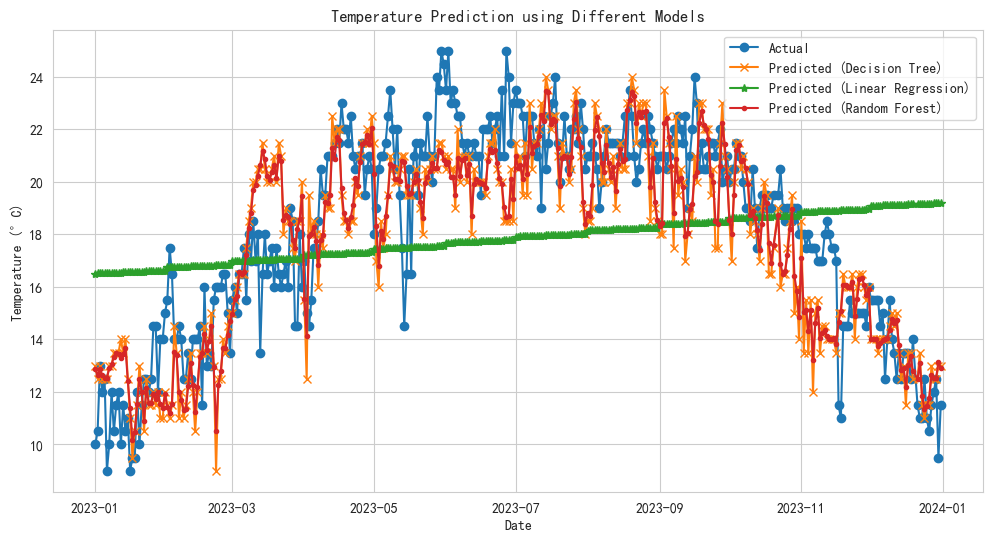

In [38]:
# 可视化评估结果1
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], y_test - y_pred_dtr, label='Decision Tree', marker='o')
plt.plot(test_data['date'], y_test - y_pred_lr, label='Linear Regression', marker='x')
plt.plot(test_data['date'], y_test - y_pred_rfr, label='Random Forest', marker='.')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Temperature Prediction Models')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# 可视化预测结果2
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], y_test, label='Actual', marker='o')
plt.plot(test_data['date'], y_pred_dtr, label='Predicted (Decision Tree)', marker='x')
plt.plot(test_data['date'], y_pred_lr, label='Predicted (Linear Regression)', marker='*')
plt.plot(test_data['date'], y_pred_rfr, label='Predicted (Random Forest)', marker='.')
plt.title('Temperature Prediction using Different Models')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# 输入指定日期,输出预测结果,最低气温和最高气温从文件中读取
def predict_temperature(year, month, day):
    data = {'year': [year], 'month': [month], 'day': [day]}
    df = pd.DataFrame(data)
    prediction_dtr = dtr.predict(df)[0]
    prediction_lr = lr.predict(df)[0]
    prediction_rfr = rfr.predict(df)[0]
    print(f"Prediction for Date: {year}-{month}-{day}")
    print(f"Decision Tree Prediction: {prediction_dtr:.2f}°C")
    print(f"Linear Regression Prediction: {prediction_lr:.2f}°C")
    print(f"Random Forest Prediction: {prediction_rfr:.2f}°C")
    
predict_temperature(2023, 1, 1)
predict_temperature(2023, 5, 20)
predict_temperature(2023, 10, 27)

Prediction for Date: 2023-1-1
Decision Tree Prediction: 13.00°C
Linear Regression Prediction: 16.51°C
Random Forest Prediction: 12.89°C
Prediction for Date: 2023-5-20
Decision Tree Prediction: 20.00°C
Linear Regression Prediction: 17.52°C
Random Forest Prediction: 20.07°C
Prediction for Date: 2023-10-27
Decision Tree Prediction: 18.50°C
Linear Regression Prediction: 18.71°C
Random Forest Prediction: 18.21°C


In [40]:
# 假设您已经有了一个包含所需特征的字典，例如：  
input_data = {
    'year': 2023,
    'month': 10,
    'day': 27,
}

# 将输入数据转换为适合模型预测的格式（例如，转换为DataFrame）  
import pandas as pd
input_df = pd.DataFrame([input_data])

print(f"预测日期: {input_data['year']}-{input_data['month']}-{input_data['day']}")
# 使用决策树回归模型进行预测  
prediction_dtr = dtr.predict(input_df)
print(f"决策树回归预测结果: {prediction_dtr[0]:.2f} °C")

# 使用线性回归模型进行预测  
prediction_lr = lr.predict(input_df)
print(f"线性回归预测结果: {prediction_lr[0]:.2f} °C")

# 使用随机森林回归模型进行预测  
prediction_rfr = rfr.predict(input_df)
print(f"随机森林回归预测结果: {prediction_rfr[0]:.2f} °C")

预测日期: 2023-10-27
决策树回归预测结果: 18.50 °C
线性回归预测结果: 18.71 °C
随机森林回归预测结果: 18.21 °C


In [41]:
import joblib  # 注意：在scikit-learn的新版本中，joblib可能需要单独安装  

# 保存决策树模型  
joblib.dump(dtr, 'decision_tree_model.pkl')

# 保存线性回归模型  
joblib.dump(lr, 'linear_regression_model.pkl')

# 保存随机森林模型  
joblib.dump(rfr, 'random_forest_model.pkl')

print("模型已保存为Pickle文件。")

模型已保存为Pickle文件。
